In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Costco Adjusted Close
COST = pd.read_csv("COST.csv", index_col = 'Date', parse_dates=True)['Adj Close']

In [3]:
# Walmart Adjusted Close
WMT = pd.read_csv("WMT.csv", index_col = 'Date', parse_dates=True)['Adj Close']

In [4]:
# Target Adjusted Close
TGT = pd.read_csv("TGT.csv", index_col = 'Date', parse_dates=True)['Adj Close']

In [5]:
# Dollar General Adjusted Close
DG = pd.read_csv("DG.csv", index_col = 'Date', parse_dates=True)['Adj Close']

<Axes: xlabel='Date'>

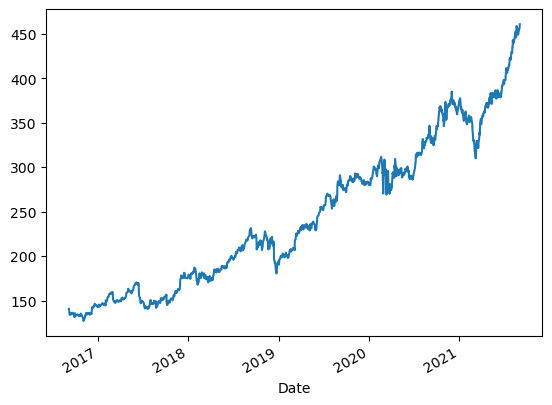

In [6]:
COST.plot()

<Axes: xlabel='Date'>

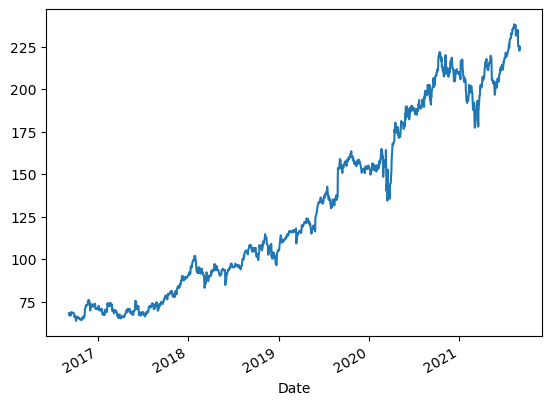

In [7]:
DG.plot()

<Axes: xlabel='Date'>

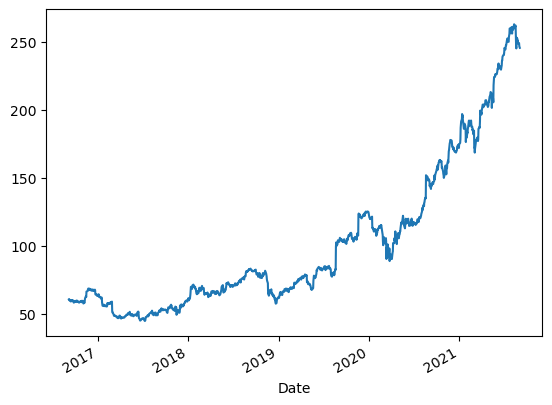

In [8]:
TGT.plot()

<Axes: xlabel='Date'>

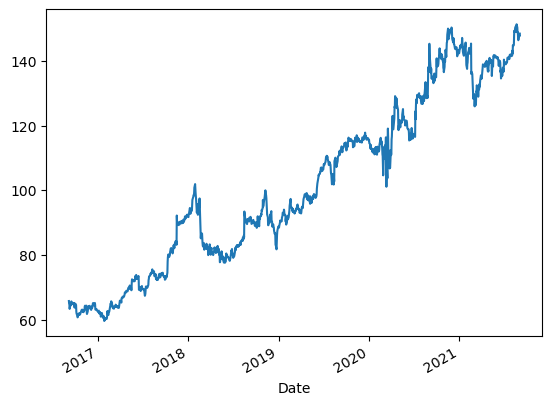

In [9]:
WMT.plot()

In [10]:
retail = pd.concat([COST,WMT,TGT,DG], axis=1)
retail.columns = ['COST', 'WMT', 'TGT', 'DG']

In [11]:
retail_returns = retail.pct_change(1).dropna()

<Axes: xlabel='Date'>

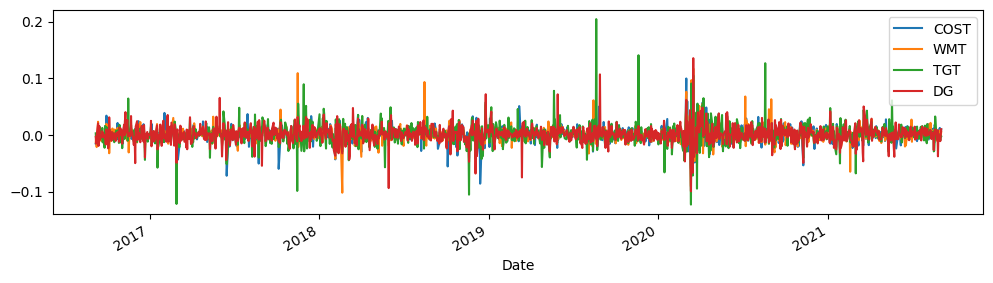

In [12]:
retail_returns.plot(figsize=(12,3))

<Axes: ylabel='Frequency'>

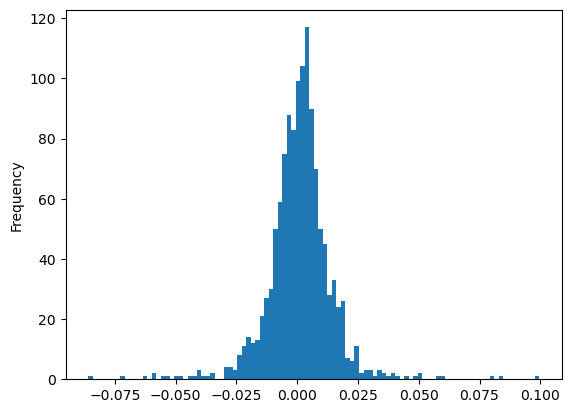

In [13]:
retail_returns['COST'].plot(kind="hist", bins = 100)

In [14]:
cumul_return = (1 + retail_returns['COST']).cumprod() - 1

In [15]:
cumul_perc_return = 100 * cumul_return

<Axes: xlabel='Date'>

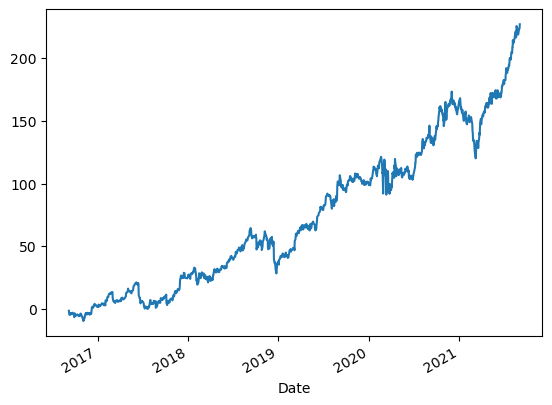

In [16]:
cumul_perc_return.plot()

In [17]:
# Dot Product
np.dot([1,0,0,0], retail_returns.transpose())

array([-0.01531071, -0.01394238, -0.01804909, ..., -0.00096507,
        0.0022613 ,  0.00974768])

In [18]:
N = len(retail_returns.columns)

In [19]:
equal_weights = N * [1/N]
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [20]:
equal_returns = np.dot(equal_weights, retail_returns.transpose())
equal_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [21]:
cum_equal_weighted_returns = (1 + equal_returns).cumprod() - 1

In [22]:
cum_equal_weighted_returns_perc = 100 * cum_equal_weighted_returns

In [23]:
cewrp = pd.Series(cum_equal_weighted_returns_perc, index = retail_returns.index)

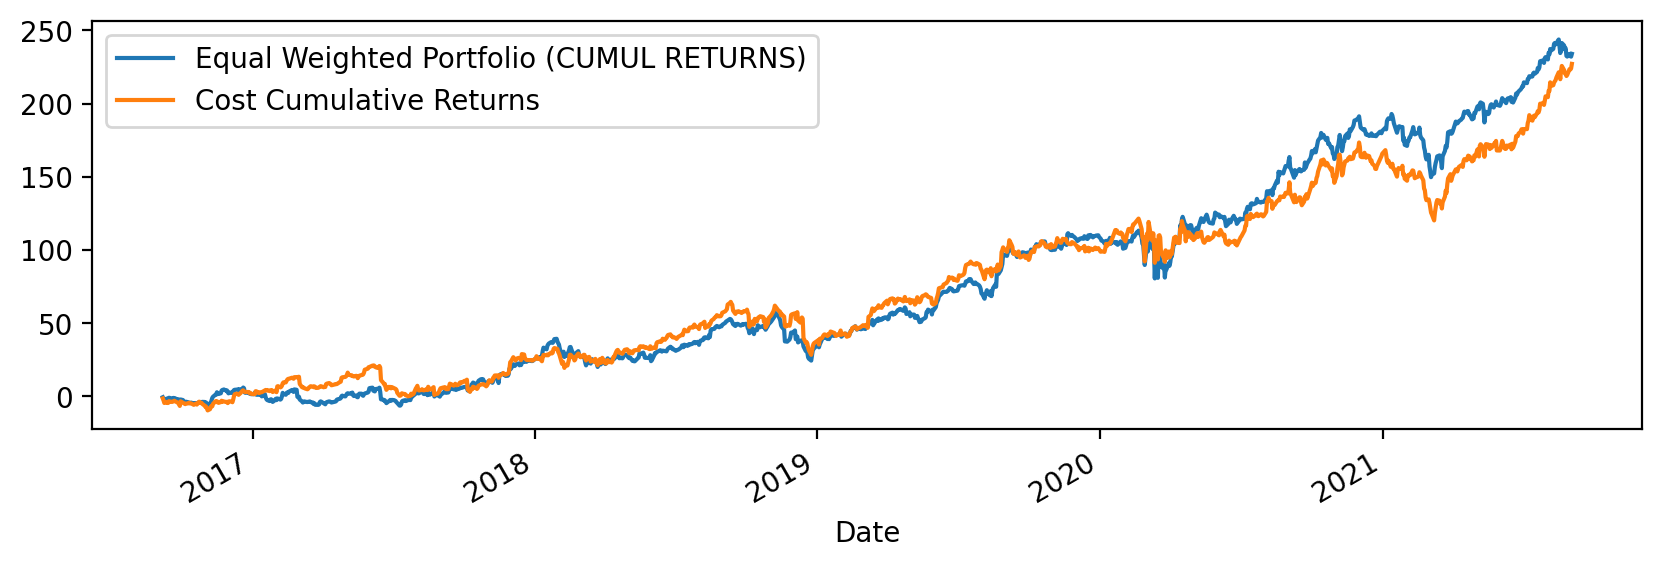

In [24]:
plt.figure(figsize=(10,3), dpi = 200)
cewrp.plot(label = 'Equal Weighted Portfolio (CUMUL RETURNS)')
cumul_perc_return.plot(label = "Cost Cumulative Returns")
plt.legend()

### Monte Carlo Simulation

In [25]:
retail / retail.shift(1) # same as 1+retail.pct_change(1)

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,0.984689,0.987123,1.002853,0.996528
2016-09-08,0.986058,0.996809,0.988051,0.984948
2016-09-09,0.981951,0.978700,0.993378,0.998726
2016-09-12,1.006569,1.023328,1.004347,1.020475
...,...,...,...,...
2021-08-27,1.002292,0.994367,1.000884,0.997123
2021-08-30,1.012413,1.008053,1.000722,1.000488
2021-08-31,0.999035,1.002708,0.990456,0.989129


In [26]:
log_rets = np.log(retail/retail.shift(1))

In [27]:
N = len(retail.columns)

In [28]:
weights = np.random.random(N)

In [29]:
weights

array([0.09159815, 0.93698568, 0.51067219, 0.66143044])

In [30]:
weights / np.sum(weights)

array([0.04162254, 0.42576973, 0.23205132, 0.30055642])

In [31]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/np.sum(weights)

In [32]:
gen_weights(10)

array([0.03567188, 0.15601133, 0.16016369, 0.08424476, 0.09022115,
       0.07017746, 0.1407125 , 0.13066741, 0.09482704, 0.0373028 ])

In [33]:
np.sum([0.01513705, 0.07948333, 0.05895476, 0.1699157 , 0.22376146,
       0.13190546, 0.0754866 , 0.15837368, 0.05630853, 0.03067342])

0.9999999900000001

In [34]:
# Returns - sum of average log returns * weights (252 days)
def calculate_returns(weights, log_rets):
    return np.sum(log_rets.mean()*weights) * 252

In [35]:
# Covariance of the log returns
log_rets_cov = log_rets.cov()

In [36]:
# For calculating volatility with weights and log returns covariate as input parameters
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [37]:
calculate_volatility(weights, log_rets.cov())

0.4424966464074246

In [38]:
log_rets = np.log(retail/retail.shift(1))
log_rets_cov = log_rets.cov()

In [45]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(6000):
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    sim_returns = calculate_returns(weights, log_rets)
    mc_portfolio_returns.append(sim_returns)
    sim_vol = calculate_volatility(weights, log_rets_cov)
    mc_portfolio_vol.append(sim_vol)

In [46]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

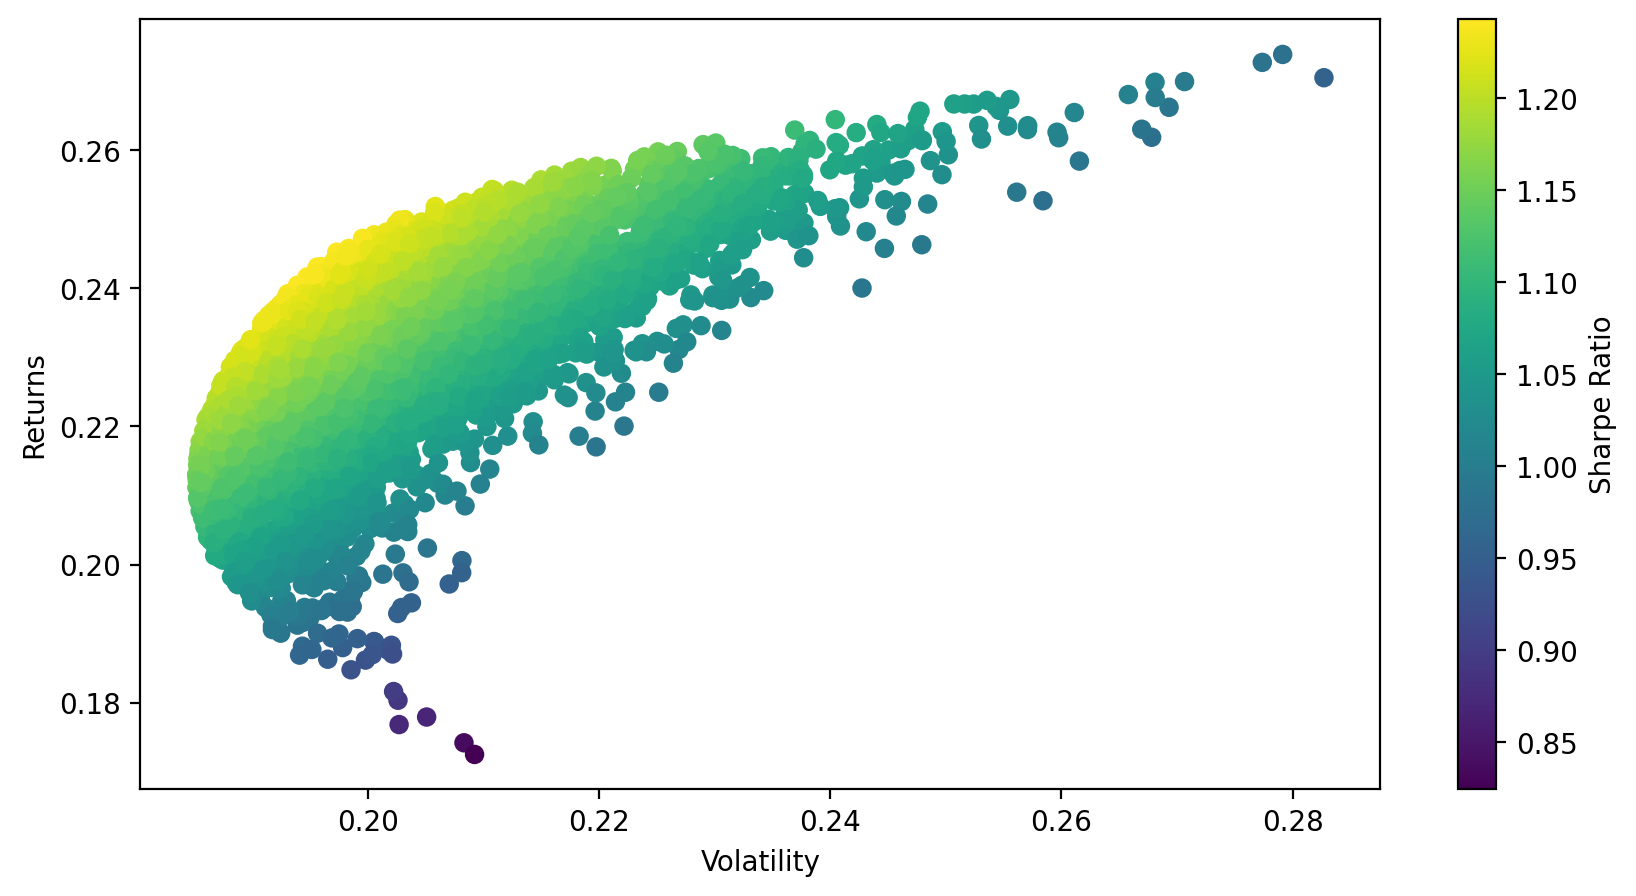

In [47]:
plt.figure(dpi=200, figsize=(10,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios)
plt.colorbar(label= "Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.show()

In [48]:
# Returns the index of the highest sharpe ratio
np.argmax(mc_sharpe_ratios)

459

In [49]:
mc_weights[867]

array([0.16601984, 0.20986475, 0.20386574, 0.42024967])